<h1>Problem set 1</h1>
<p><b>Sergio Villamarin</b></p>

<h3>P1</h3>
<p>The set of defining equations for this problem are:</p>

$$q_s(x,0)=q_s(x)=q_{s_0}+a\eta(x)$$
$$\eta(x,0)=b\sin(kx)$$
$$\frac{\partial \eta}{\partial t}=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}$$

#### 1.1
Since $\eta $ is the bed elevation with respect to a datum, the value of $b$ corresponds to the amplitude of the $\sin$ wave that defines the bed. Similarly, $k$ will affect the frequency of the wave shape as $f=2\pi k$, i.e. it makes dunes more spiky or flat. 


#### 1.2
From the three defining equations we can find a closed expresion for $\frac{\partial \eta}{\partial t}$

$$
\begin{align*}
    \frac{\partial \eta}{\partial t}(x,0)&=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}(x,0)\\
    &=-\frac{1}{\varepsilon_0}\frac{\partial}{\partial x}\left(q_{s_0}+a\eta\right)(x,0) \\
    &=-\frac{a}{\varepsilon_0}\frac{\partial \eta}{\partial x}(x,0) \\
    &=-\frac{a}{\varepsilon_0}\frac{\partial}{\partial x}\left( b\sin(kx) \right)\\
    &=-\frac{a}{\varepsilon_0}bk\cos(kx)    
\end{align*}
$$

#### 1.3
Since we want the bed elevation evolution we want a time differential for $q_s$, so we do

$$
\begin{align*}
    \frac{\partial q_s}{\partial t}(x,0)&=\frac{\partial}{\partial t}\left(q_{s_0}+a\eta\right)(x,0) \\
    &=a\frac{\partial \eta}{\partial t}(x,0) \\
    &=-\frac{a^2}{\varepsilon_0}bk\cos(kx) \\
\end{align*}
$$

Using euler's method to solve in the time dimension at $t=0$ we get
$$
\begin{align*}
    q_s(x,0+\Delta t)&\approx q_s(x,0)+\Delta t \frac{\partial q_s}{\partial t}(x,0)\\
    &=q_{s_0}+a\eta(x,0)-\Delta t\frac{a^2}{\varepsilon_0}bk\cos(kx) \\
    &=q_{s_0}+ab\sin(kx)-\Delta t\frac{a^2bk}{\varepsilon_0}\cos(kx)
\end{align*}
$$

Actually, ignore all that, I mixed up the sediment flow and the bed, but I feel bad about erasing it. From part 1.2 we have the time differential so we can apply euler's method as well

$$
\begin{align*}
    \eta(x,0+\Delta t)&\approx \eta(x,0)+\Delta t \frac{\partial \eta}{\partial t}(x,0)\\
    &=b\sin(kx)-\Delta t\frac{a}{\varepsilon_0}bk\cos(kx)
\end{align*}
$$

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
#sediment flow parameters
q0=0.22; a=1.1; 
#bed shape parameters
b=0.2; k=2.0; eps=0.5; #bed porosity not given so I'll assume 0.5
#space domain
xdelta=0.1;
start=0.0; end=4.0;
x=np.arange(start, end+xdelta,xdelta)
#time domain
tdelta=[0.05,0.1,0.15]

<Figure size 432x288 with 0 Axes>

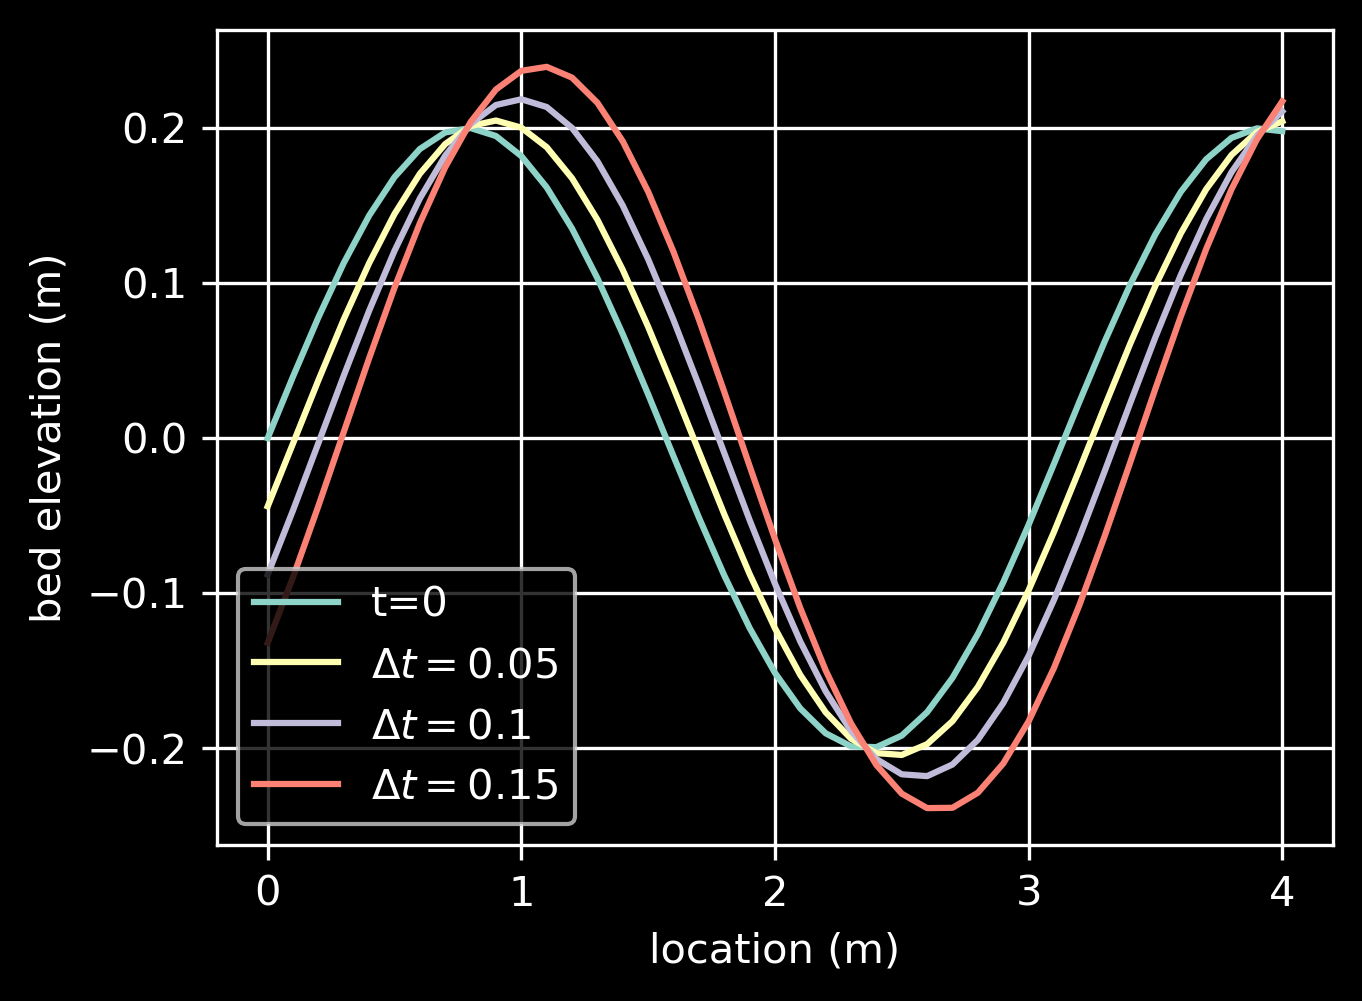

In [3]:
#clear figures
plt.cla(); plt.clf();
#setup
n=[];
plt.style.use("dark_background");
fig, ax= plt.subplots(figsize=[4.8, 3.6],dpi=300);
# initial conditions plot
n.append(b*np.sin(k*x));
ax.plot(x,n[0],label="t=0");
# different time delta plots
for i in range(len(tdelta)):
    n.append( b*np.sin(k*x)-tdelta[i]*(a*b*k/eps)*np.cos(k*x) );
    ax.plot(x,n[i+1],label="$\Delta t=$"+str(tdelta[i]));
# style of the plot
ax.set_xlabel("location (m)");
ax.set_ylabel("bed elevation (m)");
ax.legend();
ax.grid(True);
plt.show();

[0.22       0.26370725 0.30567204 0.34422134 0.37781834 0.40512362
 0.4250486  0.43679894 0.43990619 0.43424648 0.42004543 0.39786921
 0.3686019  0.3334103  0.29369739 0.2510464  0.20715769 0.16378096
 0.1226455  0.08539126 0.05350345 0.02825333 0.01064754 0.00138798
 0.00084379 0.00903666 0.02563998 0.04999181 0.08112134 0.11778752
 0.15852859 0.20172033 0.24564083 0.2885391  0.32870494 0.36453705
 0.39460693 0.41771578 0.43294233 0.43967954 0.43765881]


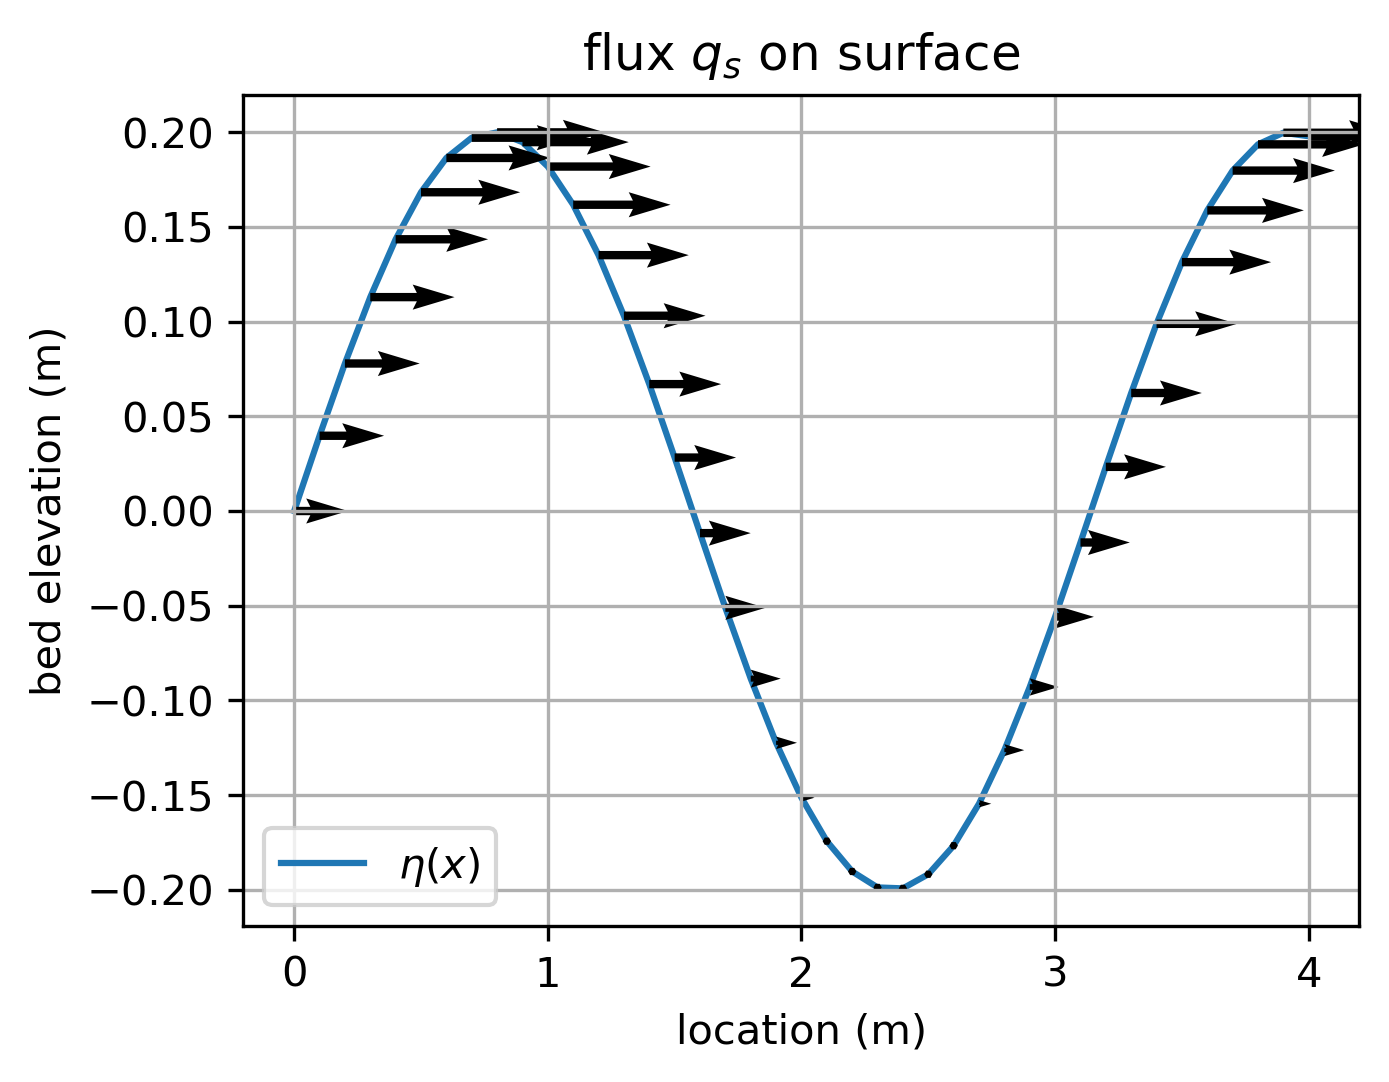

In [4]:
#now with a plot of the flow on top
plt.style.use("default");
fig2, ax2= plt.subplots(figsize=[4.8, 3.6],dpi=300);
ax2.plot(x,n[0],label="$\eta (x)$",zorder=0);
y_dummy=x*0;
q=q0+a*n[0];
print(q);
ax2.quiver(x,n[0],q,y_dummy,zorder=1);

# style of the plot
ax2.set_xlabel("location (m)");
ax2.set_ylabel("bed elevation (m)");
ax2.set_title("flux $q_s$ on surface");
ax2.legend();
ax2.grid(True);
plt.show();

#### 1.4
I can't do a sketch here... but I can do this. Call the new function $q_2(x,t)$ and its corresponding bed elevation $\eta_2$. Then we want to relate the original sediment flux and dynamics to the new ones.

Then the system defined equations are:

$$q_2(x,0)=q_2(x)=q_{s_0}+a\eta_2(x-l)=q_2(x-l)=q_s(x-l,0)$$
$$\eta_2(x,0)=b\sin(kx)$$
$$\frac{\partial \eta_2}{\partial t}=-\frac{1}{\varepsilon_0}\frac{\partial q_2}{\partial x}$$

from the last relationship and the original Exner equation we get  
$$
\begin{align*}
    \frac{\partial \eta_2}{\partial t}(x,0)&=-\frac{1}{\varepsilon_0}\frac{\partial q_2}{\partial x}(x,0) \\
    &=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}(x-l,0) \\
    &=\frac{\partial \eta}{\partial t}(x-l,0) \\
    &=\frac{\partial \eta_2}{\partial t}(x-l,0)
\end{align*}
$$

#### 1.4
Translations don't change slopes, i.e. they don't change derivatives, meaning that the only change in the original defining equations is a lag that displaces the bed but the flux acts as if it was acting on the elevation at $l$ meters to the right (positive direction) of the current location. We can see this on the next code that shifts the derivative terms by $l=1$.

In [5]:
#sediment flow parameters
q0=0.22; a=1.1;
#bed shape parameters
b=0.2; k=2.0; l=1; eps=0.5; #bed porosity not given so I'll assume 0.5
#space domain
xdelta=0.1;
start=0.0; end=4.0;
x=np.arange(start, end+xdelta,xdelta)
#time domain
tdelta=[0.05,0.1,0.15]

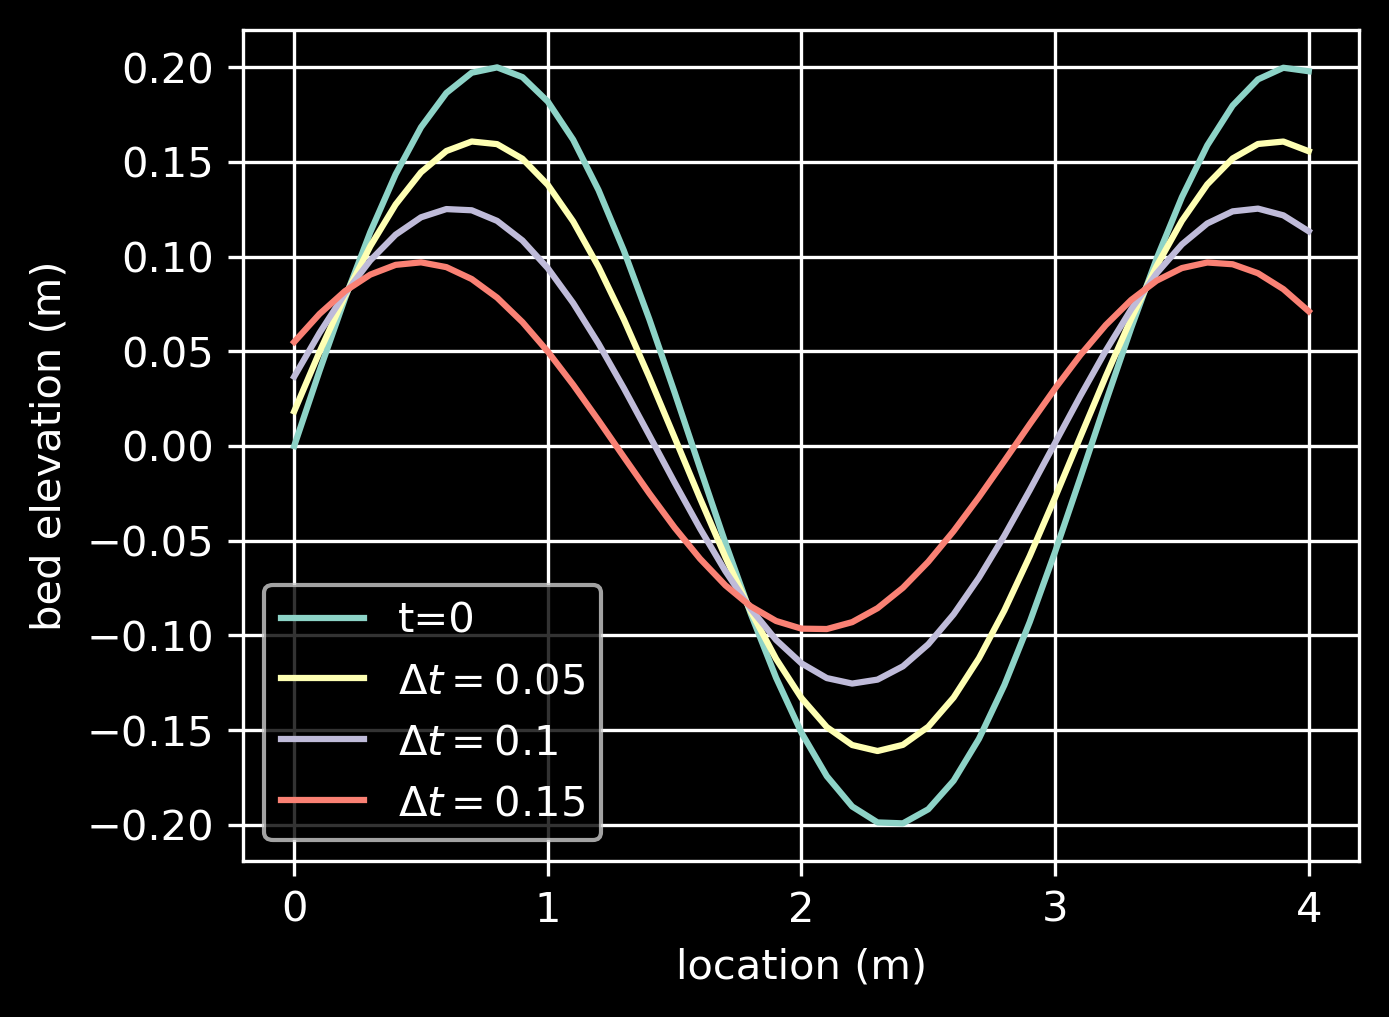

In [7]:
#setup
n=[];
plt.style.use("dark_background");
fig, ax= plt.subplots(figsize=[4.8, 3.6],dpi=300);
# initial conditions plot
n.append(b*np.sin(k*(x)));
ax.plot(x,n[0],label="t=0");
# different time delta plots
for i in range(len(tdelta)):
    n.append( b*np.sin(k*(x))-tdelta[i]*(a*b*k/eps)*np.cos(k*(x-l)) );
    ax.plot(x,n[i+1],label="$\Delta t=$"+str(tdelta[i]));
# style of the plot
ax.set_xlabel("location (m)");
ax.set_ylabel("bed elevation (m)");
ax.legend();
ax.grid(True);
plt.show();


[1.99545661e-02 5.75352121e-03 9.38073309e-05 3.20105940e-03
 1.49514011e-02 3.48763833e-02 6.21816600e-02 9.57786559e-02
 1.34327965e-01 1.76292747e-01 2.20000000e-01 2.63707253e-01
 3.05672035e-01 3.44221344e-01 3.77818340e-01 4.05123617e-01
 4.25048599e-01 4.36798941e-01 4.39906193e-01 4.34246479e-01
 4.20045434e-01 3.97869209e-01 3.68601900e-01 3.33410302e-01
 2.93697393e-01 2.51046402e-01 2.07157688e-01 1.63780958e-01
 1.22645502e-01 8.53912640e-02 5.35034510e-02 2.82533301e-02
 1.06475437e-02 1.38797920e-03 8.43786056e-04 9.03665957e-03
 2.56399757e-02 4.99918127e-02 8.11213397e-02 1.17787521e-01
 1.58528590e-01]


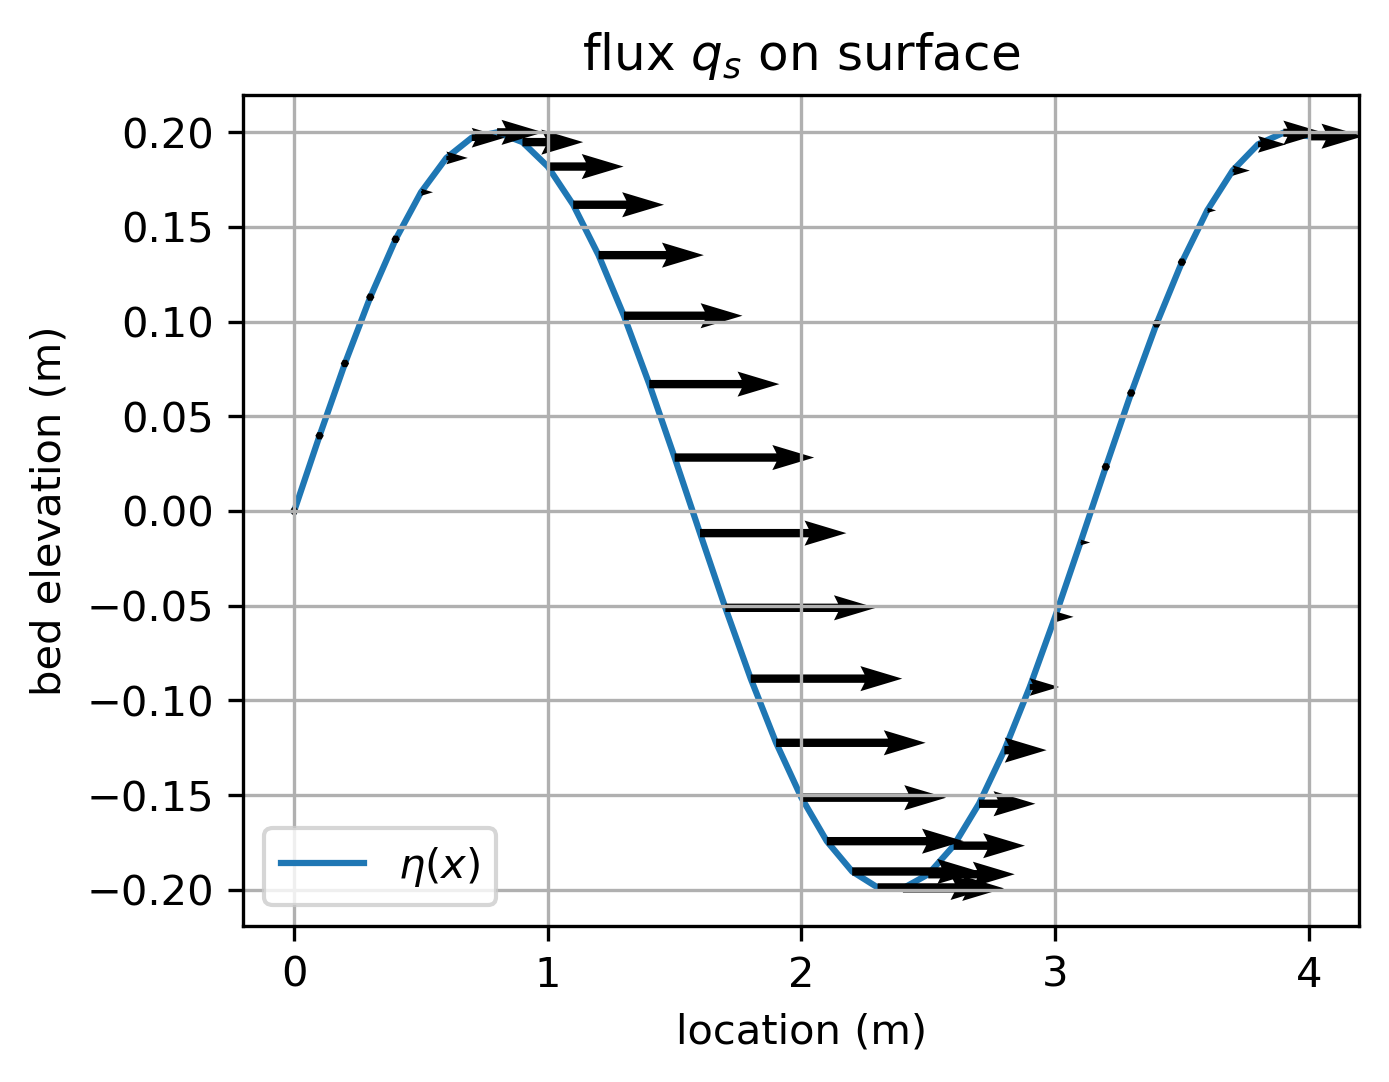

In [9]:
#now with a plot of the flow on top
plt.style.use("default");
fig2, ax2= plt.subplots(figsize=[4.8, 3.6],dpi=300);
ax2.plot(x,n[0],label="$\eta (x)$",zorder=0);
y_dummy=x*0;
q=q0+a*(b*np.sin(k*(x-l)));
print(q);
ax2.quiver(x,n[0],q,y_dummy,zorder=1);

# style of the plot
ax2.set_xlabel("location (m)");
ax2.set_ylabel("bed elevation (m)");
ax2.set_title("flux $q_s$ on surface");
ax2.legend();
ax2.grid(True);
plt.show();

### P2

I'm gonna sketch in here if that's okay

In [10]:
import numpy as np;
import matplotlib.pyplot as plt;
import math;

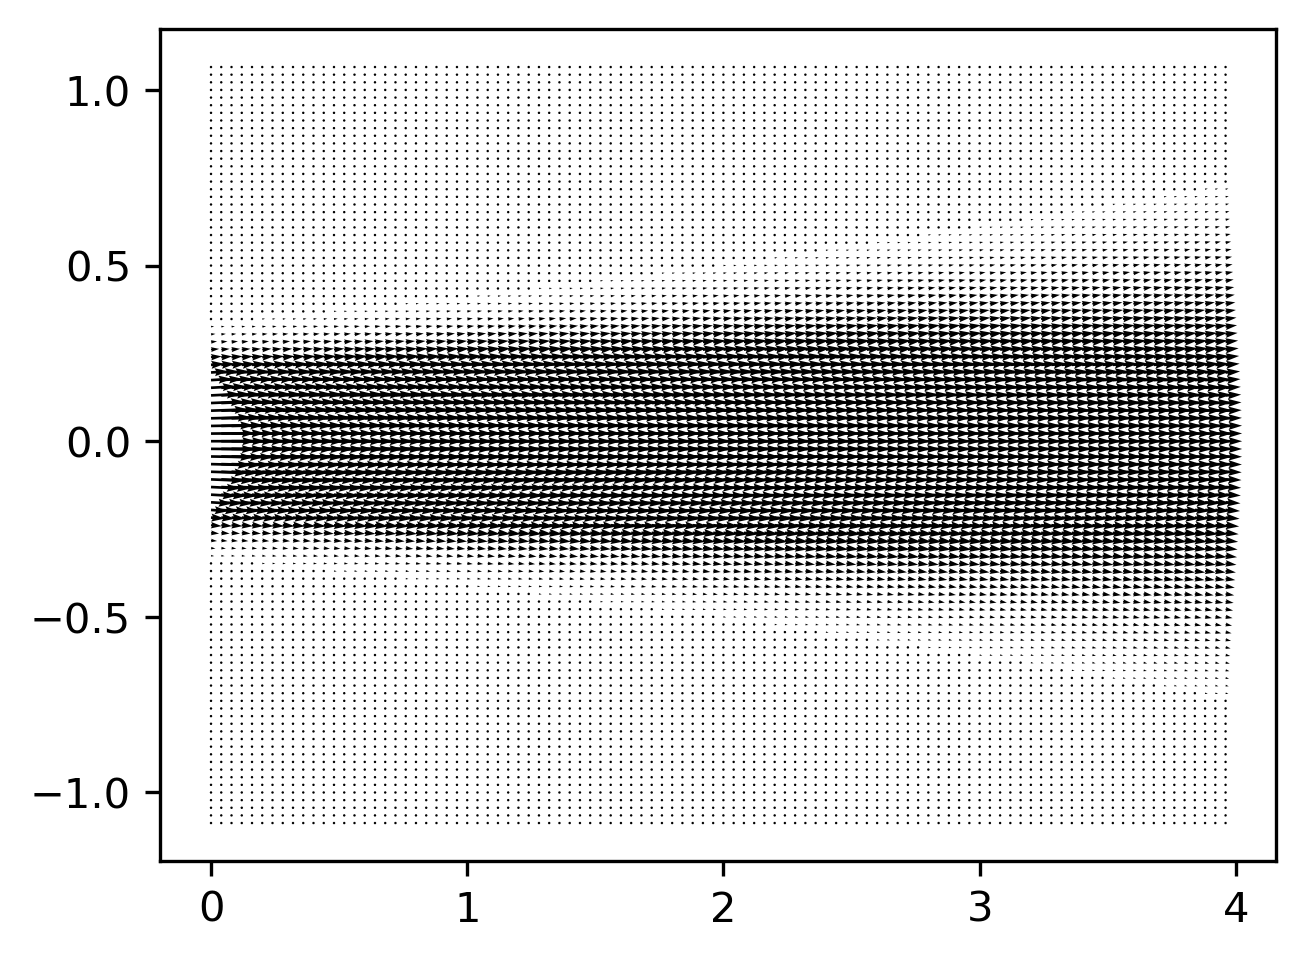

In [11]:
#Space parameters
L=4; xdelta=L/100; ydelta=0.1*L*math.exp(1)/50;
xrange=np.arange(0,L,xdelta);
yrange=np.arange(-0.1*L*math.exp(1),0.1*L*math.exp(1),ydelta);
omega=0.1*L*np.exp(xrange/L);
#grid
x,y=np.meshgrid(xrange, yrange);
#flux parameters
q0=0.2;
qx=x*0;
qy=y*0;
#defining the flow
for i in range(len(xrange)):
    for j in range(len(yrange)):
        # qx and qy are only defined inside the region -omega(x)<y<omega(x)
        if (-omega[i]<y[j,i])and(y[j,i]<omega[i]):
            qx[j,i]=q0*math.exp(-(x[j,i]/L))*math.exp(-(2*y[j,i]/omega[i] )**2);
            qy[j,i]=0.1*q0*math.exp(-(2*y[j,i]/omega[i] )**2)*math.sin(math.pi*y[j,i]/(2*omega[i]));
            
#Sketch the vector field
plt.quiver(x,y,qx,qy,scale=5);
fig = plt.gcf()
fig.set_dpi(300)
fig.set_size_inches([4.8,3.6])
plt.show()

#### 2.1
say pretty stuff about the parameters

#### 2.2
say pretty stuff about bank erosion

#### 2.3
Now, using exner equation we get

$$
\begin{align*}
    \frac{\partial \eta}{\partial t} 
    &=\frac{1}{\varepsilon_0}\nabla \cdot q_s    \\
    &=\frac{1}{\varepsilon_0}\left( \frac{\partial q_{xs}}{\partial x}+ \frac{\partial q_{ys}}{\partial y}\right)     
\end{align*}
$$

Now to simplify some of the calculations we find $\frac{\partial \omega}{\partial x}$ as:
$$
\begin{align*}
    \frac{\partial \omega}{\partial x}
    &=\frac{\partial}{\partial x}\left(0.1Le^{x/L}\right) \\
    &=(0.1Le^{x/L})(\frac{1}{L}) \\
    &= 0.1e^{x/L}=\omega/L
    
\end{align*}
$$

and now I use board to compute derivatives because it seems like too much work to do it here. From that I get
$$
\begin{align*}
    \frac{\partial q_{xs}}{\partial x}
    &=\frac{q_{xs}}{L} \left( 8\left(\frac{y}{\omega}\right)^2-1 \right) \\
    \frac{\partial q_{ys}}{\partial x}
    &=\frac{q_{ys}}{\omega} \left( \frac{\pi}{2}\cot(\frac{\pi y}{2\omega}) - \frac{8y}{\omega} \right)\\
    
\end{align*}
$$

and we could plug this into the exner equation above but that would just look messy, so I'll just use these for my calculations and to graph $\frac{\partial \eta}{\partial t}$

<ipython-input-12-8dc50c20ab33>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = plt.pcolormesh(x, y, dn, cmap="Spectral", shading='flat',norm=colorsplit);
<ipython-input-12-8dc50c20ab33>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes();


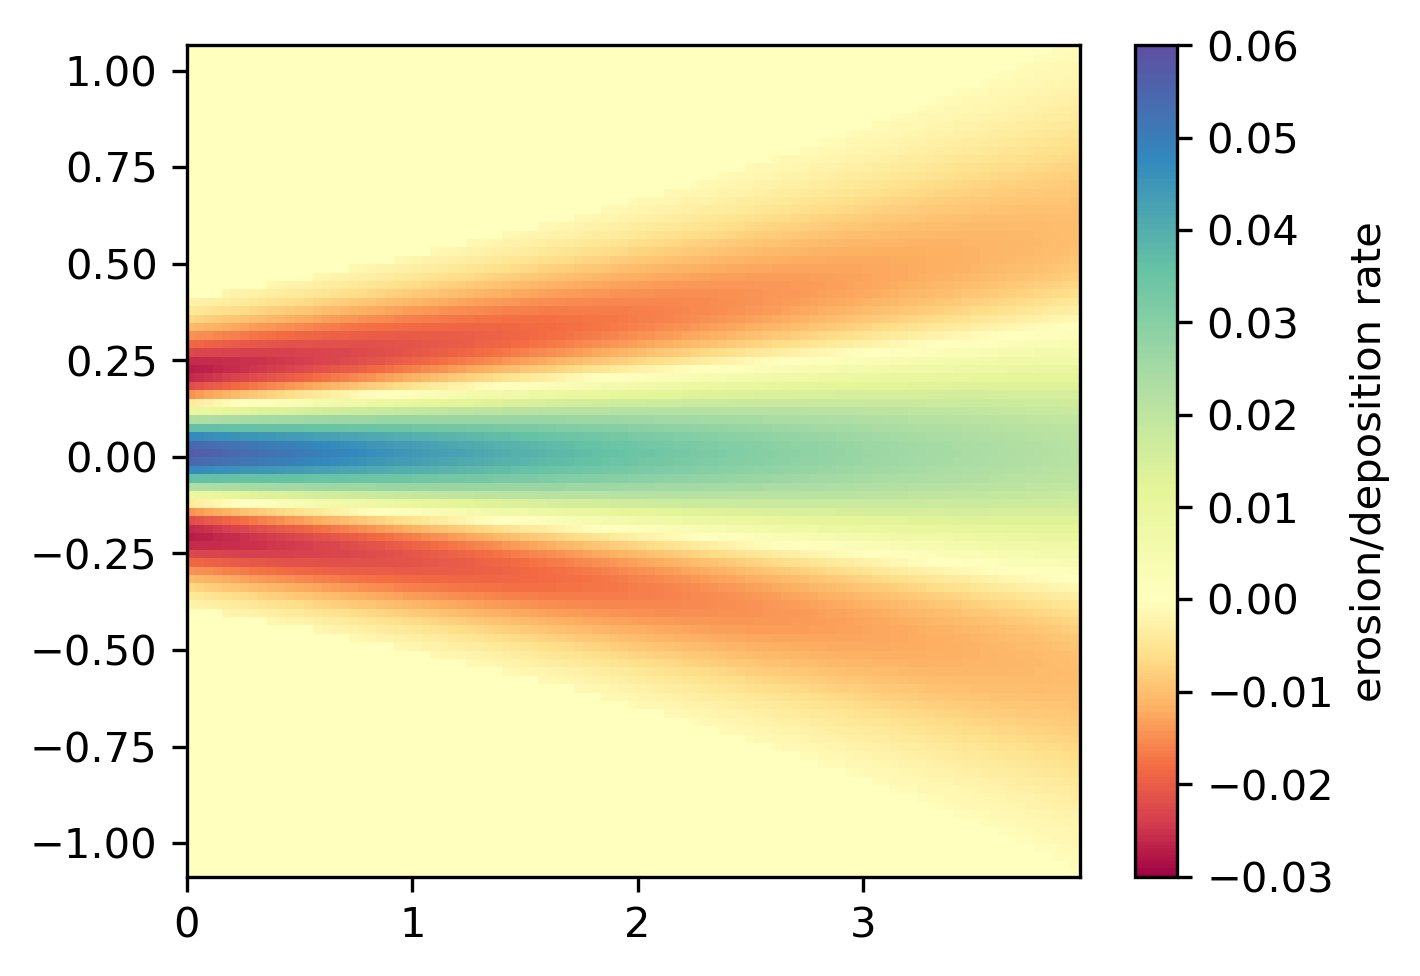

In [12]:
from matplotlib import colors
#Bed parameters
eps=0.5;
#partial derivatives for exner
inv_omega=np.reciprocal(omega);
dqx=-(qx/L)*(1-8*(y*y*inv_omega*inv_omega));
dqy=qy*( -8*y*inv_omega*inv_omega + (np.pi/2)*inv_omega*np.reciprocal(np.tan( (np.pi/2)*y*inv_omega )) );
#erosion/deposition at time 0
dn=(dqx+dqy)/eps;
#color map dn/dt for deposition / erosion
colorsplit=colors.TwoSlopeNorm(0., -0.03, 0.06);
plot = plt.pcolormesh(x, y, dn, cmap="Spectral", shading='flat',norm=colorsplit);
fig = plt.gcf();
fig.set_dpi(300);
fig.set_size_inches([4.8,3.6]);
colorbar=plt.colorbar(plot);
ax=plt.axes();
colorbar.ax.set_ylabel("erosion/deposition rate");
plt.show();
